
## Задача регрессии. Датасет Diabetes из sk-learn. Предсказание степени заболевания. Бэггинг линейных регрессий, стохастический градиентный спуск. Стэккинг(Линейная регрессия,SGD,KNNRegressor). Тест Стьюдента и Тест Уилксона для сравнения моделей.
## Метрики предсказания использованными методами не идеальны, но датасет считается сложным для прогнозирования и в медицинских задачах прогнозирования диагнозов, даже относительно высокая ошибка может считаться приемлемой, если модель предоставляет полезные и интерпретируемые результаты. Для Diabetes принято считать хорошими RMSE (Test): около 50-60% MAPE (Test): около 35-40%
Признаки:

    age -- возраст в годах
    sex -- пол
    bmi -- индекс массы тела
    bp -- среднее кровянное давление
    s1 -- общий холестерин сыворотки
    s2 -- липопротеины низкой плотности
    s3 -- липопротеины высокой плотности
    s4 -- общий холестерин
    s5 -- возможный логарифм уровня триглицеридов в сыворотке
    s6 -- уровень сахара в крови


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Импортируем из модуля datasets библиотеки sklearn Diabetes
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split


#### Diabetes

In [66]:

data = load_diabetes()

# load_diabetes возвращает словарь. Посмотрим, что является ключами
print(data.keys())

# Вытаскиваем признаки и метки
y_diabetes = data["target"]
X_diabetes = pd.DataFrame(data["data"], columns=data["feature_names"])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [67]:
print(X_diabetes.head(5))
print(y_diabetes[:5])

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
[151.  75. 141. 206. 135.]


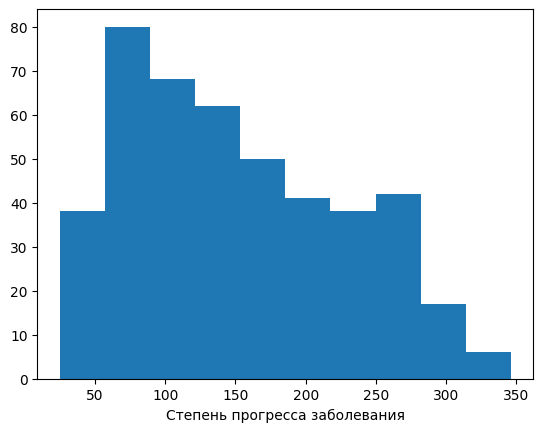

In [68]:
# Распределение таргетного столбец а

plt.hist(y_diabetes)
plt.xlabel("Степень прогресса заболевания")
plt.show()

In [69]:
# Разобьем данные на обучение и тест

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = (
    train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=2023)
)

In [70]:
from sklearn.ensemble import BaggingRegressor
# Импортируем линейную регрессию
from sklearn.linear_model import LinearRegression, SGDRegressor

# Импортируем метрики качества MAPE и MSE
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

## Бэггинг Линейной регресии

In [71]:
# Создаем модель бэггинга с базовой моделью линейной регрессии и 5 моделями (n_estimators=5)
bagging_model = BaggingRegressor(LinearRegression(), n_estimators=5)

# Обучаем ее на тренировочной части датасета Diabetes
bagging_model.fit(X_diabetes_train, y_diabetes_train)
# Посмотрим метрики
print("MAPE")
print(f"Train: {mean_absolute_percentage_error(y_diabetes_train, bagging_model.predict(X_diabetes_train))}")
print(f"Test:  {mean_absolute_percentage_error(y_diabetes_test, bagging_model.predict(X_diabetes_test))}")
print("RMSE")
print(f"Train: {mean_squared_error(y_diabetes_train, bagging_model.predict(X_diabetes_train))**0.5}")
print(f"Test:  {mean_squared_error(y_diabetes_test, bagging_model.predict(X_diabetes_test))**0.5}")

MAPE
Train: 0.36615884356425693
Test:  0.49243449401109657
RMSE
Train: 52.23615233950177
Test:  59.000099617662364


## Stochastic gradient descent

In [72]:
model_sgd = SGDRegressor(learning_rate='adaptive',  eta0=0.01, max_iter=100000,tol=1e-3)

model_sgd.fit(X_diabetes_train, y_diabetes_train)
print("MAPE")
print(f"Train: {mean_absolute_percentage_error(y_diabetes_train, model_sgd.predict(X_diabetes_train))}")
print(f"Test:  {mean_absolute_percentage_error(y_diabetes_test, model_sgd.predict(X_diabetes_test))}")
print("RMSE")
print(f"Train: {mean_squared_error(y_diabetes_train, model_sgd.predict(X_diabetes_train))**0.5}")
print(f"Test:  {mean_squared_error(y_diabetes_test, model_sgd.predict(X_diabetes_test))**0.5}")

MAPE
Train: 0.36839041560511454
Test:  0.5036898197828559
RMSE
Train: 52.53983367635869
Test:  59.07100915899258


## Стэккинг на 3 моделях

In [73]:
# Импортируем функцию стэкинга
from sklearn.ensemble import StackingRegressor
# Импортируем еще регрессор knn
from sklearn.neighbors import KNeighborsRegressor
estimators = [
     ('LogReg', LinearRegression()),
     ('SGD', SGDRegressor()),
     ("KNN", KNeighborsRegressor())
]

# Создаем модель стэкинга с моделями из estimators и финальной моделью линейной регрессией
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

stacking_model.fit(X_diabetes_train, y_diabetes_train)
print("MAPE")
print(f"Train: {mean_absolute_percentage_error(y_diabetes_train, stacking_model.predict(X_diabetes_train))}")
print(f"Test:  {mean_absolute_percentage_error(y_diabetes_test, stacking_model.predict(X_diabetes_test))}")
print("RMSE")
print(f"Train: {mean_squared_error(y_diabetes_train, stacking_model.predict(X_diabetes_train))**0.5}")
print(f"Test:  {mean_squared_error(y_diabetes_test, stacking_model.predict(X_diabetes_test))**0.5}")

MAPE
Train: 0.34384895131787496
Test:  0.4897386924247586
RMSE
Train: 49.84086484821769
Test:  58.9023396689097


In [74]:
from sklearn.model_selection import cross_val_score, KFold

X, y = load_diabetes(return_X_y=True)
folds = KFold(n_splits=5) # будем использовать разбиение на 5 фолдов
scores_lr = cross_val_score(bagging_model, X, y, scoring='neg_mean_squared_error', cv=folds)
scores_sgd = cross_val_score(model_sgd, X, y, scoring='neg_mean_squared_error', cv=folds)
scores_stacking = cross_val_score(stacking_model, X, y, scoring='neg_mean_squared_error', cv=folds)

In [75]:
scores_lr

array([-2863.06211943, -3140.52129629, -3238.10248752, -2915.24393376,
       -2942.39070782])

In [76]:
scores_sgd

array([-2930.88520682, -3024.72861349, -3155.3030632 , -2918.6256165 ,
       -3014.58963916])

In [77]:
scores_stacking

array([-2734.0039157 , -3070.55675592, -3199.26684977, -2944.05613748,
       -2948.43339479])

## Тест Стьюдента. Нулевая гипотеза что средние метрики моделей одинаковые. Возьмем стандартный 95% доверительный интервал и проведем t-test.

In [78]:
import scipy.stats as stats

stats.ttest_rel(scores_lr, scores_sgd)

TtestResult(statistic=-0.28750088653714345, pvalue=0.7880086235374266, df=4)

## Получено p-value больше, чем 0.05, значит нулевая гипотеза не отвергаеся и среднее (по всем фолдам) значения метрик одинаковые, то есть нет преимущества какой-то одной из моделей.

## критерий Уилкоксона
### Если есть подозрения, что разницы в значениях метрик на фолдах распределены ненормально, можно применить непараметрический критерий Уилкоксона (нулевая гипотеза: одинаковость медианы).

In [79]:
import scipy.stats as wilcoxon

stats.wilcoxon(scores_lr, scores_sgd)

WilcoxonResult(statistic=6.0, pvalue=0.8125)

### И снова видим, что отклонить нулевую гипотезу мы не можем. 